In [22]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load packages
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercise 7 [L5]: Function approximation

Consider the function
$$
f(x) = min \{max\{-1,4(x-0.2\},1\}
$$


### 1. The ex ante code contains an example of how well linear interpolation can approximate this function. Re-do the analysis with: 
<ol type ="a">
<li> Cubic spline (use scipy.interpolate.CubicSpline) </li>
<li> Regression with regular polynomials of 4th order</li>
<li> Regression with Chebyshev polynomials (see Chebyshev.py) </li>
</ol>


Setup


In [23]:
# Define the function 
f = lambda x: np.minimum(np.maximum(-1,4*(x-0.2)),1)

interval = [-1,1]
N_known = 10      # Number of known points
N_true = 1000     # Number of true points
N = 150           # Number of points for interpolation

#Function values
x_true  = np.linspace(interval[0],interval[1],N_true)
f_true  = f(x_true)

# Points you want to interpolate
G = np.linspace(interval[0],interval[1],N)

#known points
x_known = np.linspace(-0.8,0.8,N_known)
f_known = f(x_known)

# Define the plot 
def plot(f_interp):
    fig = plt.figure(figsize=(10,4)) 
    ax = fig.add_subplot(1,1,1)
    ax.plot(x_true,f_true)
    ax.plot(G,f_interp,'red')
    ax.scatter(x_known,f_known)

    ax.set_xlabel("x")
    ax.set_ylabel("$f(x)$")
    plt.legend(('True','Interpolation','known nodes'))
    plt.axvline(x=0.8, ls='--',color='black')
    plt.axvline(x=-0.8,ls='--',color='black')
    plt.ylim(-1.5,2)

    plt.show()

Example. Linear interpolation

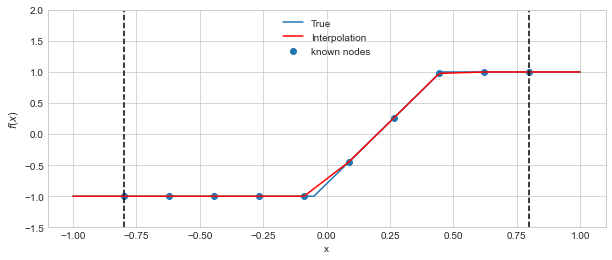

In [24]:
from scipy import interpolate

# Interpolate
f_linear_func = interpolate.interp1d(x_known,f_known, bounds_error=False, fill_value = "extrapolate")
f_linear_interp = f_linear_func(G)

# Plot
plot(f_linear_interp)

#### (1) Cubic spline (use scipy.interpolate.CubicSpline)

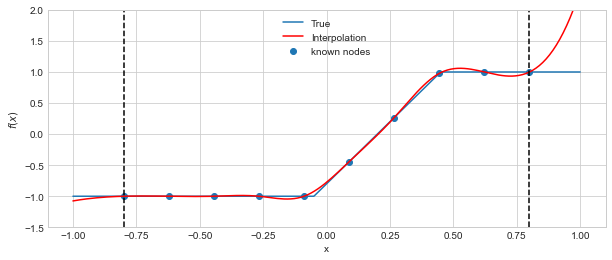

In [25]:
from scipy.interpolate import CubicSpline

# Interpolate
f_cubicSpline_func = CubicSpline(x_known,f_known, extrapolate = True)
f_cubicSpine_interp = f_cubicSpline_func(G)


# Plot
plot(f_cubicSpine_interp)


#### (2) Regression with regular polynomials of 4th order

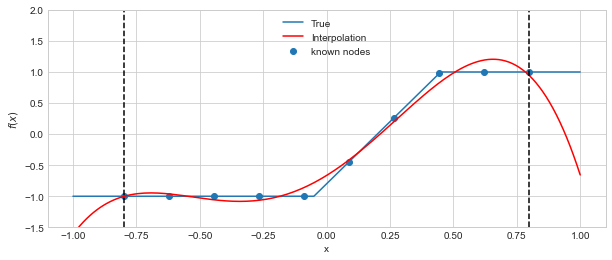

In [26]:
# Define the variables for the regression
X = np.transpose([x_known**(i) for i in range(4+1)])

# Estimate beta
b = np.linalg.inv(X.T@(X)) @ (X.T)@(f_known)

# Points to interpolate
X_grid = [G**(i) for i in range(4+1)]
X_grid = np.transpose(X_grid)

# Find the interpolated function
f_reg_curvefit = X_grid @ b

# Plot
plot(f_reg_curvefit)

#### (3) Regression with Chebyshev polynomials (see Chebyshev.py)

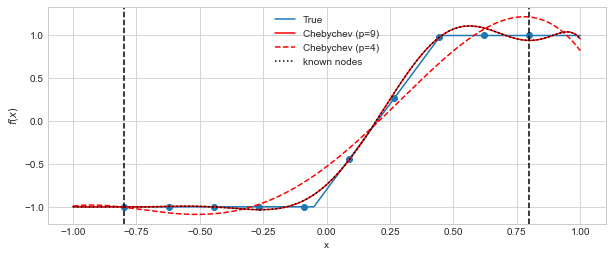

In [29]:
from InterpolationFunctions import *

f_chebyshev_9,_ = Chebyshev_illustration(f,G,N_known,9)
f_chebyshev_4,_ = Chebyshev_illustration(f,G,N_known,4)

# my
points = G
num_nodes = N_known
degree = 9

nodes = Chebyshev_nodes(points,num_nodes)
f_actual = f(nodes)
coefs = Chebyshev_coefs(f_actual,num_nodes,degree)

f_my = np.nan + np.ones(points.size)
for i in range(points.size):
    f_my[i] = interp_chebyshev(points,coefs,degree,points[i])


# Plot
fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(1,1,1)
ax.plot(x_true,f_true)
ax.plot(G,f_chebyshev_9,'red')
ax.plot(G,f_chebyshev_4,'red',ls='--')
ax.plot(points,f_my,'black',ls=':')
ax.scatter(x_known,f_known)

ax.set_xlabel("x")
ax.set_ylabel("$f(x)$")
plt.legend(('True','Chebychev (p=9)','Chebychev (p=4)','known nodes'))
plt.axvline(x=0.8, ls='--',color='black')
plt.axvline(x=-0.8,ls='--',color='black')
plt.show()